In [2]:
!pip install highlight_text

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text

  Obtaining dependency information for highlight_text from https://files.pythonhosted.org/packages/b2/ca/acb9567cf3cde352a08e2b6bb6e0b0e278061d07b2e0bf9bdd7cfaa9bded/highlight_text-0.2-py3-none-any.whl.metadata


In [6]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return"<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [7]:
df = pd.read_csv('beeswarmTutorial.csv')

In [23]:
text_color = 'grey'
background = '#313332'

In [9]:
df.head()

,Player,Pos,Squad,90s,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11
2,Che Adams\Che-Adams,FW,Southampton,19.0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36
4,Adrián\Adrian,GK,Liverpool,2.0,0


In [10]:
df['per90'] = df['Prog']/df['90s']
df

,Player,Pos,Squad,90s,Prog,per90
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,Adrián\Adrian,GK,Liverpool,2.0,0,0.000000
...,...,...,...,...,...,...
492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74,3.957219
493,Andi Zeqiri\Andi-Zeqiri,FWDF,Brighton,0.8,1,1.250000
494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39,5.492958
495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42,6.000000


In [11]:
df = df[df['90s']>=6.5].reset_index()
df

,index,Player,Pos,Squad,90s,Prog,per90
0,0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,6,Ola Aina\Ola-Aina,DF,Fulham,17.7,69,3.898305
...,...,...,...,...,...,...,...
300,491,Wilfried Zaha\Wilfried-Zaha,FW,Crystal Palace,18.5,39,2.108108
301,492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74,3.957219
302,494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39,5.492958
303,495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42,6.000000


In [12]:
df.describe()

,index,90s,Prog,per90
count,305.000000,305.000000,305.000000,305.000000
mean,241.468852,14.688525,43.655738,3.019502
std,146.384632,4.758721,31.651934,1.798697
min,0.000000,6.600000,0.000000,0.000000
25%,110.000000,10.900000,21.000000,1.932773
50%,243.000000,14.700000,37.000000,2.857143
75%,371.000000,18.800000,60.000000,4.000000
max,496.000000,23.000000,171.000000,9.879518


In [13]:
df = df.sort_values(by='per90', ascending=False)


In [14]:
df = df[df['Pos']!= 'GK']

Text(0.5, 25.722222222222214, 'Pases progresivos por 90')

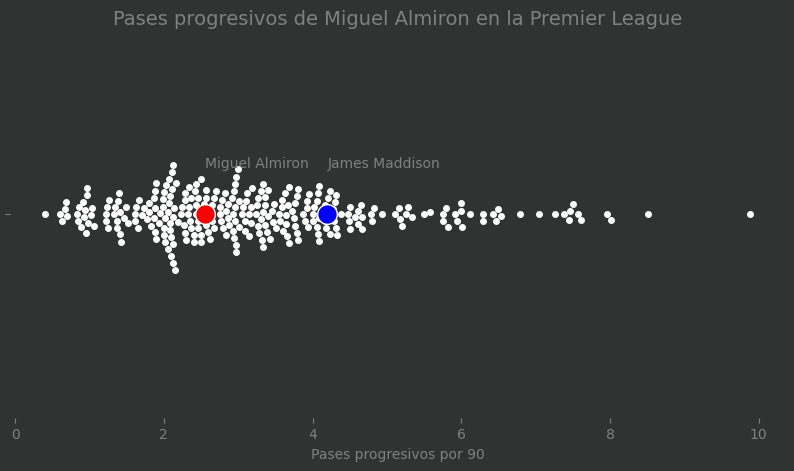

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted', lw=.5, color='lightgrey', axis='y', zorder=1)
spines = ['top', 'bottom', 'left', 'right']

for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
sns.swarmplot(x='per90', data=df, color='white', zorder=1)

#Miguel Almiron
plt.scatter(x=2.56,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='Miguel Almiron',x=2.56,y=-.004,c=text_color)

#James Maddison
plt.scatter(x=4.20,y=0,c='blue',edgecolor='white',s=200,zorder=2)
plt.text(s='James Maddison',x=4.20,y=-0.004,c=text_color)

plt.title('Pases progresivos de Miguel Almiron en la Premier League', c=text_color, fontsize=14)

plt.xlabel('Pases progresivos por 90', c=text_color)